In [12]:
#import libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

#Call data
jan2018 = pd.read_csv('ks-projects-201801.csv', low_memory=False\
                      #dtype={"ID": int, "name": str,"category": str, 'mainCategory':str,\
                      #'country':str,'currency': str,'launched':str, 'deadline':str,\
                      #'state':object,'backers': int,'usdPledged': int, 'usdGoal':int}
                      )
#pd.options.display.float_format = '{:,.0f}'.format

In [13]:
jan2018.head()

,ID,name,category,mainCategory,country,currency,launched,deadline,state,backers,usdPledged,usdGoal
0,1.000002e+09,The Songs of Adelaide & Abullah,Poetry,Publishing,GB,GBP,8/11/15 12:12,10/9/15,failed,0.0,0,1534
1,1.000004e+09,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,US,USD,9/2/17 4:43,11/1/17,failed,15.0,2421,30000
2,1.000004e+09,Where is Hank?,Narrative Film,Film & Video,US,USD,1/12/13 0:20,2/26/13,failed,3.0,220,45000
3,1.000008e+09,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,USD,3/17/12 3:24,4/16/12,failed,1.0,1,5000
4,1.000011e+09,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,USD,7/4/15 8:35,8/29/15,canceled,14.0,1283,19500


[       0        0        0 ... 12779843 13285226 20338986]
[        0         0         0 ... 110169772 151395870 166361391]


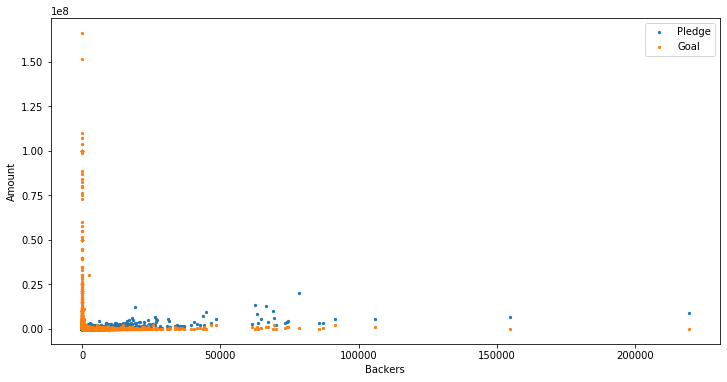

In [14]:
#Outliers
sortedPledges = np.sort(jan2018['usdPledged'])
sortedGoals = np.sort(jan2018['usdGoal'])
print(sortedPledges)
print(sortedGoals)

#Scatter Chart

fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(jan2018['backers'], jan2018['usdPledged'],s=5)
ax.scatter(jan2018['backers'], jan2018['usdGoal'],s=5)

ax.set_xlabel('Backers')
ax.set_ylabel('Amount')


legend_labels=['Pledge','Goal']
plt.legend(legend_labels, loc=1)

plt.show()

In [31]:
#Pledge statistical values

projectPledgeMean2018 = np.mean(jan2018['usdPledged'])

projectPledgeMedian2018 = np.median(jan2018['usdPledged'])

projectPledgeStd2018 = np.std(jan2018['usdPledged'])

projectPledgeFirstQuarter2018 = np.percentile(jan2018['usdPledged'],25)

projectPledgeP50 = np.percentile(jan2018['usdPledged'],50)

projectPledgeThirdQuarter2018 = np.percentile(jan2018['usdPledged'],75)
projectPledgeInquartileRange2018 = projectPledgeThirdQuarter2018 - projectPledgeFirstQuarter2018

print ("Pledge Mean 2018")
print (projectPledgeMean2018)
print ("")
print ("Pledge Median 2018")
print (projectPledgeMedian2018)
print ("")
print ("Pledge Standard Deviation 2018")
print (projectPledgeStd2018)
print ("")
print ("Pledge Percentile 25")
print (projectPledgeFirstQuarter2018)
print ("")
print ("Pledge Percentile 50")
print (projectPledgeP50)
print ("")
print ("Pledge Percentile 75")
print (projectPledgeThirdQuarter2018)
print ("")
print ("Pledge Interquartile Range")
print (projectPledgeInquartileRange2018)


Pledge Mean 2018
3271.3565391126053

Pledge Median 2018
0.0

Pledge Standard Deviation 2018
54841.63715163886

Pledge Percentile 25
0.0

Pledge Percentile 50
0.0

Pledge Percentile 75
77.0

Pledge Interquartile Range
77.0


In [20]:
#Goal statistical values

projectGoalMean2018 = np.mean(jan2018['usdGoal'])
projectGoalMedian2018 = np.median(jan2018['usdGoal'])
projectGoalStd2018 = np.std(jan2018['usdGoal'])
projectGoalFirstQuarter2018 = np.percentile(jan2018['usdGoal'],25)
projectGoalThirdQuarter2018 = np.percentile(jan2018['usdGoal'],75)
projectGoalInquartileRange2018 = projectGoalThirdQuarter2018 - projectGoalFirstQuarter2018

print ("Goal Mean 2018")
print (projectGoalMean2018)
print ("")
print ("Goal Median 2018")
print (projectGoalMedian2018)
print ("")
print ("Goal Standard Deviation 2018")
print (projectGoalStd2018)
print ("")
print ("Goal Percentile 25")
print (projectGoalFirstQuarter2018)
print ("")
print ("Goal Percentile 75")
print (projectGoalThirdQuarter2018)
print ("")
print ("Goal Interquartile Range")
print (projectGoalInquartileRange2018)


Goal Mean 2018
16414.476431347306

Goal Median 2018
0.0

Goal Standard Deviation 2018
693187.9132578981

Goal Percentile 25
0.0

Goal Percentile 75
2700.0

Goal Interquartile Range
2700.0


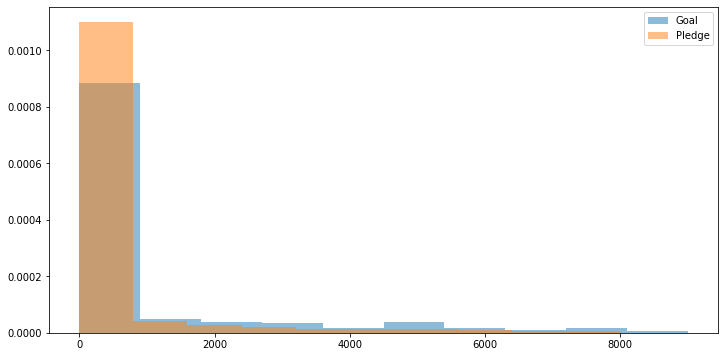

In [21]:
#Draw Project State Histogram
fig, ax2 = plt.subplots(figsize=(12,6))
ax2.hist(jan2018['usdGoal'],range={0,9000}, bins=10, alpha=0.5, label="Goal", density=True)
ax2.hist(jan2018['usdPledged'],range={0,8000}, bins=10, alpha=0.5, label="Pledge", density=True)

ax2.legend()


plt.show()

In [22]:
#Category Fail , Success and Cancel Grouping

mainCategory2018Status = jan2018.groupby(['state','mainCategory']).ID.count().reset_index()
mainCategory2018Status.columns = ['state', 'mainCategory','count']

mainCategory2018Status.head()

,state,mainCategory,count
0,canceled,Art,2222
1,canceled,Comics,842
2,canceled,Crafts,843
3,canceled,Dance,163
4,canceled,Design,4152


In [23]:
#Category Fail , Success and Cancel Pivot

mainCategoryPivot2018 = mainCategory2018Status.pivot(
                columns = 'state',
                index = 'mainCategory',
                values='count'
    ).reset_index()

mainCategoryPivot2018['total'] = mainCategoryPivot2018.canceled +\
    mainCategoryPivot2018.failed + mainCategoryPivot2018.live +\
    mainCategoryPivot2018.successful + mainCategoryPivot2018.suspended

In [24]:
# Success and Fail rate

mainCategoryPivot2018['failRate'] =  ( mainCategoryPivot2018.canceled + mainCategoryPivot2018.failed ) /\
    mainCategoryPivot2018.total

mainCategoryPivot2018['sucessRate'] = (mainCategoryPivot2018.successful + mainCategoryPivot2018.live) /\
    mainCategoryPivot2018.total

In [25]:
#Category Revenue

mainCategory2018Revenue = jan2018.groupby('mainCategory').usdPledged.sum().reset_index()
mainCategory2018Revenue = mainCategory2018Revenue.sort_values('usdPledged',ascending=False)


mainCategory2018Revenue.head()

,mainCategory,usdPledged
8,Games,741327600
4,Design,734220337
13,Technology,688872603
6,Film & Video,391555259
10,Music,200318873


In [26]:
# Join Revenue on Pivot

mainCategoryPivot2018 = mainCategoryPivot2018.merge(mainCategory2018Revenue,how='left', on='mainCategory')

In [27]:
#Category Backers

mainCategory2018Backers = jan2018.groupby('mainCategory').backers.sum().reset_index()
mainCategory2018Backers = mainCategory2018Backers.sort_values('backers',ascending=False)


mainCategory2018Backers.head()


,mainCategory,backers
8,Games,11336829.0
4,Design,7255880.0
13,Technology,5356513.0
6,Film & Video,4197577.0
10,Music,2708475.0


In [28]:
# Join Backers on Pivot
mainCategoryPivot2018 = mainCategoryPivot2018.merge(mainCategory2018Backers,how='left', on='mainCategory')

# Average Ticket per cateogry

mainCategoryPivot2018['avgTicket'] =  mainCategoryPivot2018.usdPledged / mainCategoryPivot2018.backers

mainCategoryPivot2018 = mainCategoryPivot2018.sort_values(['failRate','usdPledged'],ascending=False)

mainCategoryPivot2018

,mainCategory,canceled,failed,live,successful,suspended,undefined,total,failRate,sucessRate,usdPledged,backers,avgTicket
13,Technology,4715.0,20616.0,377.0,6434.0,424.0,3.0,32566.0,0.777836,0.209145,688872603,5356513.0,128.604673
9,Journalism,523.0,3137.0,31.0,1012.0,52.0,NaN,4755.0,0.769716,0.219348,12437682,182091.0,68.304760
2,Crafts,843.0,5703.0,76.0,2115.0,72.0,NaN,8809.0,0.743104,0.248723,14384311,240342.0,59.849344
7,Food,2211.0,15969.0,184.0,6085.0,153.0,NaN,24602.0,0.738964,0.254817,125806605,1332751.0,94.396181
5,Fashion,2650.0,14182.0,250.0,5593.0,138.0,3.0,22813.0,0.737825,0.256126,130335325,1401993.0,92.964319
11,Photography,986.0,6384.0,48.0,3305.0,55.0,1.0,10778.0,0.683800,0.311097,38501668,428078.0,89.940777
12,Publishing,3602.0,23145.0,299.0,12300.0,66.0,462.0,39412.0,0.678651,0.319674,133576100,2231589.0,59.856945
4,Design,4152.0,14814.0,305.0,10550.0,247.0,2.0,30068.0,0.630770,0.361015,734220337,7255880.0,101.189702
8,Games,6202.0,16003.0,287.0,12518.0,220.0,1.0,35230.0,0.630287,0.363469,741327600,11336829.0,65.391090
6,Film & Video,5755.0,32904.0,332.0,23623.0,117.0,854.0,62731.0,0.616266,0.381869,391555259,4197577.0,93.281257


In [30]:
avgTicketMean = np.mean(mainCategoryPivot2018['avgTicket'])
print ("avgTicketMean")
print (avgTicketMean)

avgTicketMean
81.26058437780361


In [ ]:
#Save Tables
mainCategoryPivot2018.to_csv('summary2018.csv')